# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Introduction to Artificial Neural Networks with Keras

"ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable,making them ideal to tackle large and highly complex Machine Learning tasks such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go (DeepMind’s AlphaGo)."

## From Biological to Artificial Neurons

Will ANN's die again? Probably not: 
- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.
- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.
- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (and when it is the case, they are usually fairly close to the global optimum).
- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress and even more amazing products.


## Biological Neurons

Skimmed

## Logical Computations with Neurons 

![title](images/logical_comp.png)

Let’s see what these networks do:
- The first network on the left is the identity function: if neuron A is activated,then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.     
- The second network performs a logical AND: neuron C is activated only when     both neurons A and B are activated (a single input signal is not enough to activate neuron C). 
- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).     
- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A  is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.


## The Perceptron

![title](images/perceptron.png)
![title](images/perceptron_2.png)

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a Logistic Regression or linear SVM classifier).

A **Perceptron** is simply composed of a **single layer of TLUs**, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a **dense layer**. The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is
typically represented using a special type of neuron called a bias neuron, which outputs 1 all the time.

![title](images/perceptron_3.png)
![title](images/perceptron_4.png) 

In this equation:
- As always, X represents the matrix of input features. It has one row per instanceand one column per feature.
- The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificialneuron in the layer.
- The bias vector b contains all the connection weights between the bias neuronand the artificial neurons. It has one bias term per artificial neuron.
- The function ϕ is called the activation function: when the artificial neurons areTLUs, it is a step function (but we will discuss other activation functions shortly).

So, how is a Perceptron trained? The Perceptron training algorithm proposed by
Rosenblatt was largely inspired by Hebb’s rule. In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, **“Cells that fire together, wire together”**; that is, the connection weight between two neurons tends to increase when they fire simultaneously

**Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the Perceptron learning rule reinforces connections that help reduce the error**. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

![title](images/perceptron_5.png) 

In this equation:
- wi, j is the connection weight between the ith input neuron and the jth output neuron.
- xi is the ith input value of the current training instance.
- y j is the output of the jth output neuron for the current training instance.
- yj is the target output of the jth output neuron for the current training instance.
- η is the learning rate.

**The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns** (just like Logistic Regression classifiers). However, **if the training instances are linearly separable**, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the **Perceptron convergence theorem**.


Scikit-Learn provides a Perceptron class that implements a single-TLU network. It can be used pretty much as you would expect—for example, on the iris dataset (introduced in Chapter 4):

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


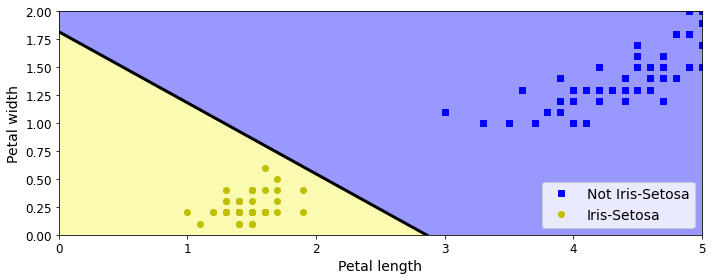

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

You may have noticed that the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regression over Perceptrons.

#### Limitations 
In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem).

#### The Solution
It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multilayer Perceptron (MLP). An MLP can solve the XOR problem.

## The Multilayer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer (see Figure 10-7). The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

![title](images/mlp_1.png) 

**NOTE:** The signal flows only in one direction (from the inputs to the outputs),
so this architecture is an example of a **feedforward neural network
(FNN).**

When an ANN contains a deep stack of hidden layers,9 it is called a **deep neural network (DNN).** The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. Even so, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. But in 1986, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a groundbreaking paper that introduced the **backpropagation training algorithm**, which is still used today. **In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter.** In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

**NOTE:** Automatically computing gradients is called automatic differentiation,
or autodiff. There are various autodiff techniques, with different
pros and cons. The one used by backpropagation is called
reverse-mode autodiff. It is fast and precise, and is well suited when
the function to differentiate has many variables (e.g., connection
weights) and few outputs (e.g., one loss). 

### Backpropagation in More Detail

Let’s run through this algorithm in a bit more detail:
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
- Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.
- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

**SUMMARY:** This algorithm is so important that it’s worth summarizing it again: for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

**WARNING:** It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

### Popular Activation Functions
- logistic (sigmoid) function, σ(z) = 1 / (1 + exp(–z)).
- The hyperbolic tangent function: tanh(z) = 2σ(2z) – 1
- The Rectified Linear Unit function: ReLU(z) = max(0, z)

### Why do we need activation functions in the first place? 
Well, if you chain several linear transformations, all you get is a linear transformation. For example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

## Regression MLP's

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. If you want to guarantee that the output will always be positive, then you can use the ReLU activation function in the output layer. Alternatively, you can use the softplus activation function, which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)). It is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range: 0 to 1 for the logistic function and –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you
have a lot of outliers in the training set, you may prefer to use the mean absolute
error instead. Alternatively, you can use the Huber loss, which is a combination of
both.

**NOTE:** The Huber loss is quadratic when the error is smaller than a threshold
δ (typically 1) but linear when the error is larger than δ. The
linear part makes it less sensitive to outliers than the mean squared
error, and the quadratic part allows it to converge faster and be
more precise than the mean absolute error.

![title](images/mlp_reg.png) 


## Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks (see Chapter 3). For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer (see Figure 10-9). The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called multiclass classification.

![title](images/mlp_cla_1.png) 

![title](images/mlp_cla_2.png) 


**TIP:** Before we go on, I recommend you go through exercise 1 at the  
end of this chapter. You will play with various neural network  
architectures and visualize their outputs using the TensorFlow Playground.  
This will be very useful to better understand MLPs, including  
the effects of all the hyperparameters (number of layers and  
neurons, activation functions, and more).  

# Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. Its documentation (or specification) is available at https://keras.io/. The reference implementation, also called Keras, was developed by François Chollet as part of a research project13 and was released as an open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design. To perform the heavy computations required by neural networks, this reference implementation relies on a computation backend. At present, you can choose from three popular open source Deep Learning libraries: TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano. Therefore, to avoid any confusion, we will refer to this reference implementation as multibackend Keras.

Since late 2016, other implementations have been released. You can now run Keras on Apache MXNet, Apple’s Core ML, JavaScript or TypeScript (to run Keras code in a web browser), and PlaidML (which can run on all sorts of GPU devices, not just Nvidia). Moreover, TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features (see Figure 10-10): for example, it supports TensorFlow’s Data API, which makes it easy to load and preprocess data efficiently. For this reason, we will use tf.keras in this book. However, in this chapter we will not use any of the TensorFlow-specific features, so the code should run fine on other Keras implementations as well (at least in Python), with only minor modifications, such as changing the imports.

## Installing TensorFlow 2

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.3.0'

In [7]:
keras.__version__

'2.4.0'

### Building an Image Classifier Using the Sequential API

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [9]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [10]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

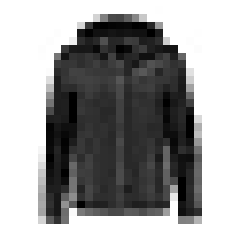

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [15]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


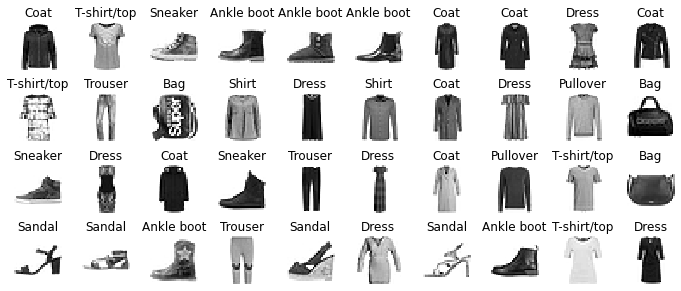

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Creating the model using the Sequential API

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:
- The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.
- Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting input_shape=[28,28].
- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.
- Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

**TIP:** Specifying activation="relu" is equivalent to specifying   
activation=keras.activations.relu.Other activation functions are   
available in the keras.activations package, we will use many of  
them in this book. See https://keras.io/activations/ for the full list.  

Instead of adding the layers one by one as we just did, you can pass a list of layers  
when creating the Sequential model:

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

![title](images/using_keras.png) 


In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The model’s summary() method displays all the model’s layers,14 including each layer’s  
name (which is automatically generated unless you set it when creating the layer), its    
output shape (None means the batch size can be anything), and its number of parameters.  
The summary ends with the total number of parameters, including trainable and  
non-trainable parameters. Here we only have trainable parameters (we will see examples  
of non-trainable parameters in Chapter 11):

Note that Dense layers often have a lot of parameters. For example, the first hidden  
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to  
235,500 parameters! This gives the model quite a lot of flexibility to fit the training  
data, but it also means that the model runs the risk of overfitting, especially when you  
do not have a lot of training data. We will come back to this later  

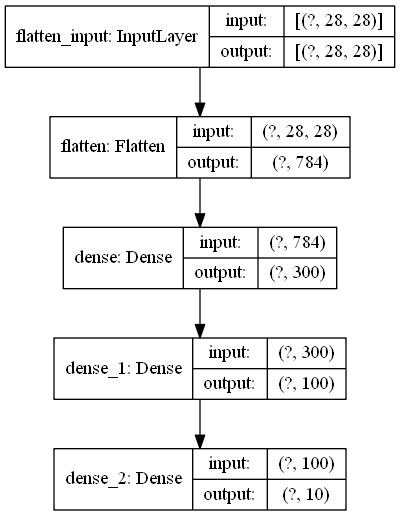

In [23]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:

In [24]:
model.layers

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and  
set_weights() methods. For a Dense layer, this includes both the connection weights  
and the bias terms:  

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were initialized to zeros, which is fine. If you ever want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer. We will discuss initializers further in Chapter 11, but if you want the full list, see https://keras.io/initializers/.

**TIP:** The shape of the weight matrix depends on the number of inputs.  
This is why it is recommended to specify the input_shape when  
creating the first layer in a Sequential model. However, if you do  
not specify the input shape, it’s OK: Keras will simply wait until it  
knows the input shape before it actually builds the model. This will  
happen either when you feed it actual data (e.g., during training),  
or when you call its build() method. Until the model is really  
built, the layers will not have any weights, and you will not be able  
to do certain things (such as print the model summary or save the  
model). So, if you know the input shape when creating the model,   
it is best to specify it.  

### Compiling the model

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**TIP:** Using loss="sparse_categorical_crossentropy" is equivalent to  
using loss=keras.losses.sparse_categorical_crossentropy.  
Similarly, specifying optimizer="sgd" is equivalent to specifying  
optimizer=keras.optimizers.SGD(), and metrics=["accuracy"]  
is equivalent to metrics=[keras.metrics.sparse_categori
cal_accuracy] (when using this loss). We will use many other losses,  
optimizers, and metrics in this book; for the full lists, see  
https://keras.io/losses, https://keras.io/optimizers, and 
https://keras.io/metrics.

This code requires some explanation. First, we use the "sparse_categorical_cross
entropy" loss because we have sparse labels (i.e., for each instance, there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we
had one target probability per class for each instance (such as one-hot vectors, e.g.
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead. If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

**NOTE:** If you want to convert sparse labels (i.e., class indices) to one-hot  
vector labels, use the keras.utils.to_categorical() function. To  
go the other way round, use the np.argmax() function with axis=1.

Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic  
Gradient Descent. In other words, Keras will perform the backpropagation  
algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent). We  
will discuss more efficient optimizers in Chapter 11 (they improve the Gradient  
Descent part, not the autodiff).

**TIP:** When using the SGD optimizer, it is important to tune the learning    
rate. So, you will generally want to use optimizer=keras.optimizers.SGD(lr=???)  
to set the learning rate, rather than optimizer="sgd", which defaults to lr=0.01.

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training
and evaluation.

### Training and evaluating the model

Now the model is ready to be trained. For this we simply need to call its fit() method:

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4392 - accuracy: 0.8457 - val_loss: 0.5358 - val_accuracy: 0.7976
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4126 - accuracy: 0.8564 - val_loss: 0.3921 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3939 - accuracy: 0.8618 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3753 - accuracy: 0.8676 - val_loss: 0.3694 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3633 - accuracy: 0.8711 - val_loss: 0.3616 - val_accuracy:

We pass it the input features (X_train) and the target classes (y_train), as well as the
number of epochs to train (or else it would default to just 1, which would definitely
not be enough to converge to a good solution). We also pass a validation set (this is
optional). Keras will measure the loss and the extra metrics on this set at the end of
each epoch, which is very useful to see how well the model really performs. If the performance
on the training set is much better than on the validation set, your model is 
probably overfitting the training set (or there is a bug, such as a data mismatch
between the training set and the validation set).

And that’s it! The neural network is trained. At each epoch during training, Keras
displays the number of instances processed so far (along with a progress bar), the
mean training time per sample, and the loss and accuracy (or any other extra metrics
you asked for) on both the training set and the validation set. You can see that the
training loss went down, which is a good sign, and the validation accuracy reached
89.26% after 30 epochs. That’s not too far from the training accuracy, so there does
not seem to be much overfitting going on.

**NOTE:** Instead of passing a validation set using the validation_data  
argument, you could set validation_split to the ratio of the  
training set that you want Keras to use for validation. For example,  
validation_split=0.1 tells Keras to use the last 10% of the data  
(before shuffling) for validation.  

If the training set was very skewed, with some classes being overrepresented and others
underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, which would give a larger weight to underrepresented
classes and a lower weight to overrepresented classes. These weights would be used by
Keras when computing the loss. If you need per-instance weights, set the sam
ple_weight argument (if both class_weight and sample_weight are provided, Keras
multiplies them). Per-instance weights could be useful if some instances were labeled
by experts while others were labeled using a crowdsourcing platform: you might want
to give more weight to the former. You can also provide sample weights (but not class
weights) for the validation set by adding them as a third item in the validation_data
tuple.

The fit() method returns a History object containing the training parameters
(history.params), the list of epochs it went through (history.epoch), and most
importantly a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if
any). If you use this dictionary to create a pandas DataFrame and call its plot()
method, you get the learning curves:

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


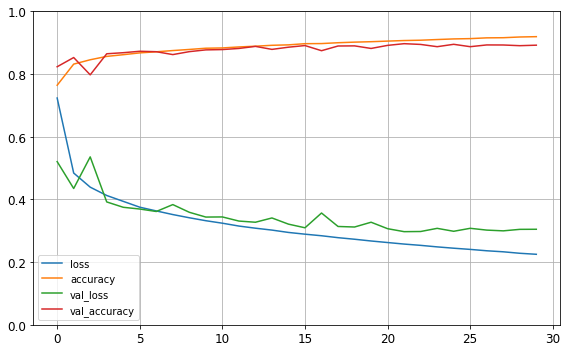

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

You can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease.
Good! Moreover, the validation curves are close to the training curves, which means
that there is not too much overfitting. In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning of
training. But that’s not the case: indeed, the validation error is computed at the end of
each epoch, while the training error is computed using a running mean during each
epoch. So the training curve should be shifted by half an epoch to the left. If you do
that, you will see that the training and validation curves overlap almost perfectly at
the beginning of training.

**NOTE:**  When plotting the training curve, it should be shifted by half an epoch to the left. 

The training set performance ends up beating the validation performance, as is generally
the case when you train for long enough. You can tell that the model has not
quite converged yet, as the validation loss is still going down, so you should probably
continue training. It’s as simple as calling the fit() method again, since Keras just
continues training where it left off (you should be able to reach close to 89% validation
accuracy).

If you are not satisfied with the performance of your model, you should go back and
tune the hyperparameters. The first one to check is the learning rate. If that doesn’t
help, try another optimizer (and always retune the learning rate after changing any
hyperparameter). If the performance is still not great, then try tuning model hyperparameters
such as the number of layers, the number of neurons per layer, and the
types of activation functions to use for each hidden layer. You can also try tuning
other hyperparameters, such as the batch size (it can be set in the fit() method using
the batch_size argument, which defaults to 32). We will get back to hyperparameter
tuning at the end of this chapter. Once you are satisfied with your model’s validation
accuracy, you should evaluate it on the test set to estimate the generalization error
before you deploy the model to production. You can easily do this using the evalu
ate() method (it also supports several other arguments, such as batch_size and
sample_weight; please check the documentation for more details):

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8808


[0.3381699323654175, 0.8808000087738037]

As we saw in Chapter 2, it is common to get slightly lower performance on the test set
than on the validation set, because the hyperparameters are tuned on the validation
set, not the test set (however, in this example, we did not do any hyperparameter tuning,
so the lower accuracy is just bad luck). Remember to resist the temptation to
tweak the hyperparameters on the test set, or else your estimate of the generalization
error will be too optimistic.

### Using the model to make predictions 

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning:** model.predict_classes(X_new) is deprecated. It is replaced with   
np.argmax(model.predict(X_new), axis=-1).

In [42]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


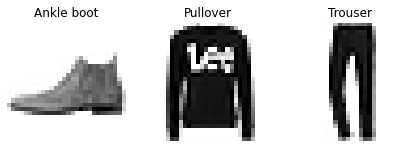

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):



In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

Using the Sequential API to build, train, evaluate, and use a regression MLP to make
predictions is quite similar to what we did for classification. The main differences are
the fact that the output layer has a single neuron (since we only want to predict a single
value) and uses no activation function, and the loss function is the mean squared
error. Since the dataset is quite noisy, we just use a single hidden layer with fewer
neurons than before, to avoid overfitting:

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 985us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 765us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 957us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 804us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 660us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 758us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 742us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 736us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 754us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 744us/step - loss: 0.487

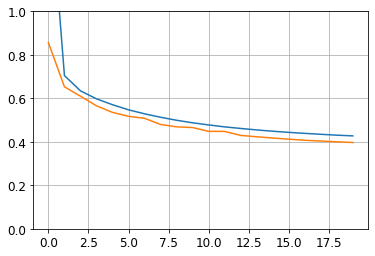

In [49]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

## Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer.

This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng
et al.16 It connects all or part of the inputs directly to the output layer, as shown in
Figure 10-14. This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path)

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

![title](images/wide_deep_1.png)

In [52]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Let’s go through each line of this code:
-  First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly.
- Next, we create a Dense layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.
- We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.
- Next, we create a Concatenate layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and immediately calls it with the given inputs.
- Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.
- Lastly, we create a Keras Model, specifying which inputs and outputs to us- 

In [53]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [54]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 744us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 788us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 769us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 778us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 736us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 780us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 767us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 741us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 735us/step - loss: 0.4659 

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

![title](images/multi_input.png)

In [55]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

The code is self-explanatory. You should name at least the most important layers,
especially when the model gets a bit complex like this. Note that we specified
inputs=[input_A, input_B] when creating the model. Now we can compile the
model as usual, but when we call the fit() method, instead of passing a single input
matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per
input.19 The same is true for X_valid, and also for X_test and X_new when you call
evaluate() or predict():

In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.7643 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 829us/step - loss: 0.7584 - val_loss: 0.6710
Epoch 3/20
363/363 [==============================] - 0s 801us/step - loss: 0.6584 - val_loss: 0.6169
Epoch 4/20
363/363 [==============================] - 0s 787us/step - loss: 0.6023 - val_loss: 0.5710
Epoch 5/20
363/363 [==============================] - 0s 766us/step - loss: 0.5663 - val_loss: 0.5420
Epoch 6/20
363/363 [==============================] - 0s 817us/step - loss: 0.5380 - val_loss: 0.5176
Epoch 7/20
363/363 [==============================] - 0s 836us/step - loss: 0.5187 - val_loss: 0.5065
Epoch 8/20
363/363 [==============================] - 0s 744us/step - loss: 0.5025 - val_loss: 0.4790
Epoch 9/20
363/363 [==============================] - 0s 828us/step - loss: 0.4889 - val_loss: 0.4564
Epoch 10/20
363/363 [==============================] - 0s 799us/step - loss: 0.4781 

Adding an auxiliary output for regularization:

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

![title](images/multi_output.png)

Each output will need its own loss function. Therefore, when we compile the model,
we should pass a list of losses20 (if we pass a single loss, Keras will assume that the
same loss must be used for all outputs). By default, Keras will compute all these losses
and simply add them up to get the final loss used for training. We care much more
about the main output than about the auxiliary output (as it is just used for regularization),
so we want to give the main output’s loss a much greater weight. Fortunately,
it is possible to set all the loss weights when compiling the model:

In [59]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

Now when we train the model, we need to provide labels for each output. In this
example, the main output and the auxiliary output should try to predict the same
thing, so they should use the same labels. So instead of passing y_train, we need to
pass (y_train, y_train) (and the same goes for y_valid and y_test):

In [60]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 941us/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 939us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 962us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - va

There are many use cases in which you may want to have multiple outputs:
- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.
- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

When we evaluate the model, Keras will return the total loss, as well as all the individual
losses:

In [61]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 669us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


Similarly, the predict() method will return predictions for each output:

In [65]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# The subclassing API

Both the Sequential API and the Functional API are declarative: you start by declaring
which layers you want to use and how they should be connected, and only then
can you start feeding the model some data for training or inference. This has many
advantages: the model can easily be saved, cloned, and shared; its structure can be
displayed and analyzed; the framework can infer shapes and check types, so errors
can be caught early (i.e., before any data ever goes through the model). It’s also fairly
easy to debug, since the whole model is a static graph of layers. But the flip side is just
that: it’s static. Some models involve loops, varying shapes, conditional branching,
and other dynamic behaviors. For such cases, or simply if you prefer a more imperative
programming style, the Subclassing API is for you.  

Simply subclass the Model class, create the layers you need in the constructor, and use
them to perform the computations you want in the call() method. For example, creating
an instance of the following WideAndDeepModel class gives us an equivalent
model to the one we just built with the Functional API. You can then compile it, evaluate
it, and use it to make predictions, exactly like we just did:

In [66]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [67]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 939us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 922us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 985us/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 950us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.596

This example looks very much like the Functional API, except we do not need to create
the inputs; we just use the input argument to the call() method, and we separate
the creation of the layers21 in the constructor from their usage in the call() method.
The big difference is that you can do pretty much anything you want in the call()
method: for loops, if statements, low-level TensorFlow operations—your imagination
is the limit (see Chapter 12)! This makes it a great API for researchers experimenting
with new ideas.  

This extra flexibility does come at a cost: your model’s architecture is hidden within
the call() method, so Keras cannot easily inspect it; it cannot save or clone it; and
when you call the summary() method, you only get a list of layers, without any information
on how they are connected to each other. Moreover, Keras cannot check types
and shapes ahead of time, and it is easier to make mistakes. So unless you really need
that extra flexibility, you should probably stick to the Sequential API or the Functional
API.

**TIP:** Keras models can be used just like regular layers, so you can easily
combine them to build complex architectures.

# Saving and Restoring Modelsb

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [84]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 981us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 739us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 724us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 747us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 761us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 713us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 691us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 728us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 772us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 511us/step - loss: 0.438

Keras will use the HDF5 format to save both the model’s architecture (including every
layer’s hyperparameters) and the values of all the model parameters for every layer
(e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters
and any state it may have). In Chapter 19, we will see how to save a
tf.keras model using TensorFlow’s SavedModel format instead.

In [85]:
model.save("models/my_keras_model.h5")

You will typically have a script that trains a model and saves it, and one or more
scripts (or web services) that load the model and use it to make predictions. Loading
the model is just as easy:

In [86]:
model = keras.models.load_model("models/my_keras_model.h5")

In [87]:
model.predict(X_new)

array([[0.5400237],
       [1.6505971],
       [3.0098243]], dtype=float32)

**WARNING:** This will work when using the Sequential API or the Functional  
API, but unfortunately not when using model subclassing. You can  
use save_weights() and load_weights() to at least save and  
restore the model parameters, but you will need to save and restore  
everything else yourself.  

In [88]:
model.save_weights("models/my_keras_weights.ckpt")

In [89]:
model.load_weights("models/my_keras_weights.ckpt")

But what if training lasts several hours? This is quite common, especially when training
on large datasets. In this case, you should not only save your model at the end of
training, but also save checkpoints at regular intervals during training, to avoid losing
everything if your computer crashes. But how can you tell the fit() method to save
checkpoints? Use callbacks.

# Using Callbacks

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

The fit() method accepts a callbacks argument that lets you specify a list of objects
that Keras will call at the start and end of training, at the start and end of each epoch,
and even before and after processing each batch. For example, the ModelCheckpoint
callback saves checkpoints of your model at regular intervals during training, by
default at the end of each epoch:

Moreover, if you use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint. In this case, it will only
save your model when its performance on the validation set is the best so far. This
way, you do not need to worry about training for too long and overfitting the training
set: simply restore the last model saved after training, and this will be the best model
on the validation set. The following code is a simple way to implement early stopping
(introduced in Chapter 4):

In [92]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("models/my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 948us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 791us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 807us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 754us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 727us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 808us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 752us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 478us/step - loss: 0.4382


Another way to implement early stopping is to simply use the EarlyStopping callback.
It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the patience argument), and it will optionally roll
back to the best model. You can combine both callbacks to save checkpoints of your
model (in case your computer crashes) and interrupt training early when there is no
more progress (to avoid wasting time and resources):

In [93]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 998us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 764us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 759us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 804us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 754us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 737us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 800us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 760us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 807us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 783us/step - l

363/363 [==============================] - 0s 765us/step - loss: 0.3338 - val_loss: 0.3407
Epoch 78/100
363/363 [==============================] - 0s 741us/step - loss: 0.3335 - val_loss: 0.3462
Epoch 79/100
363/363 [==============================] - 0s 789us/step - loss: 0.3332 - val_loss: 0.3347
Epoch 80/100
363/363 [==============================] - 0s 786us/step - loss: 0.3329 - val_loss: 0.3354
Epoch 81/100
363/363 [==============================] - 0s 755us/step - loss: 0.3324 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 758us/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 728us/step - loss: 0.3317 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 795us/step - loss: 0.3312 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 688us/step - loss: 0.3310 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 794us/step - loss:

The number of epochs can be set to a large value since training will stop automatically
when there is no more progress. In this case, there is no need to restore the best
model saved because the EarlyStopping callback will keep track of the best weights
and restore them for you at the end of training.

**NOTE:** There are many other callbacks available in the [keras.callbacks
package](https://keras.io/api/callbacks/).

If you need extra control, you can easily write your own custom callbacks. As an
example of how to do that, the following custom callback will display the ratio
between the validation loss and the training loss during training (e.g., to detect overfitting):

In [94]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

As you might expect, you can implement on_train_begin(), on_train_end(),
on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end(). Callbacks
can also be used during evaluation and predictions, should you ever need them
(e.g., for debugging). For evaluation, you should implement on_test_begin(),
on_test_end(), on_test_batch_begin(), or on_test_batch_end() (called by evalu
ate()), and for prediction you should implement on_predict_begin(), on_pre
dict_end(), on_predict_batch_begin(), or on_predict_batch_end() (called by
predict()).

In [95]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

321/363 [=========================>....] - ETA: 0s - loss: 0.3286
val/train: 1.08
363/363 [==============================] - 0s 872us/step - loss: 0.3302 - val_loss: 0.3556
